<a href="https://colab.research.google.com/github/Laexey/DataScianceLearn/blob/master/titanic_survived.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [0]:
data = pd.read_csv('drive/My Drive/DataSciance/titanic_ds/train.csv')
data_test = pd.read_csv('drive/My Drive/DataSciance/titanic_ds/test.csv')

In [0]:
test_pass_id = data_test.PassengerId
y = data.Survived
data.drop(columns=['Survived'], axis = 1, inplace = True)

In [0]:
def modify_data(data):
  result = data.copy()
  result['NameLength'] = result['Name'].apply(lambda x: len(x))
  result['Cabin'].fillna(value='X', inplace=True)
  result['CabinLetter'] = result['Cabin'].apply(lambda x: str(x)[0])
  result = result.drop(['PassengerId','Ticket','Name', 'Cabin', 'Embarked'], axis=1)
  result = pd.get_dummies(result, columns=['Sex', 'CabinLetter'])
  result['Age'].fillna(value=result['Age'].mean(),inplace=True)
  result['Fare'].fillna(value=result['Fare'].mean(), inplace=True)
  return result


In [0]:
X = modify_data(data)
X.head()
X.drop(['CabinLetter_T'], axis=1, inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [248]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [249]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits = 6)
scores = cross_val_score(tree, X_train, y_train, cv = kfold)
print("Train mean score: {0:.2f}".format(scores.mean()))
print("Test score: {0:.2f}".format(tree.score(X_test, y_test)))

Train mean score: 0.80
Test score: 0.82


In [250]:
for n, im in zip (X.columns, tree.feature_importances_):
  print(n,'\t', '{0:.3f}'.format(im))


Pclass 	 0.156
Age 	 0.101
SibSp 	 0.042
Parch 	 0.000
Fare 	 0.066
NameLength 	 0.017
Sex_female 	 0.000
Sex_male 	 0.566
CabinLetter_A 	 0.000
CabinLetter_B 	 0.000
CabinLetter_C 	 0.000
CabinLetter_D 	 0.000
CabinLetter_E 	 0.000
CabinLetter_F 	 0.000
CabinLetter_G 	 0.000
CabinLetter_X 	 0.051


In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='titanic.dot',
                class_names=['died','survied'],
                feature_names=X.columns,
                filled=True)

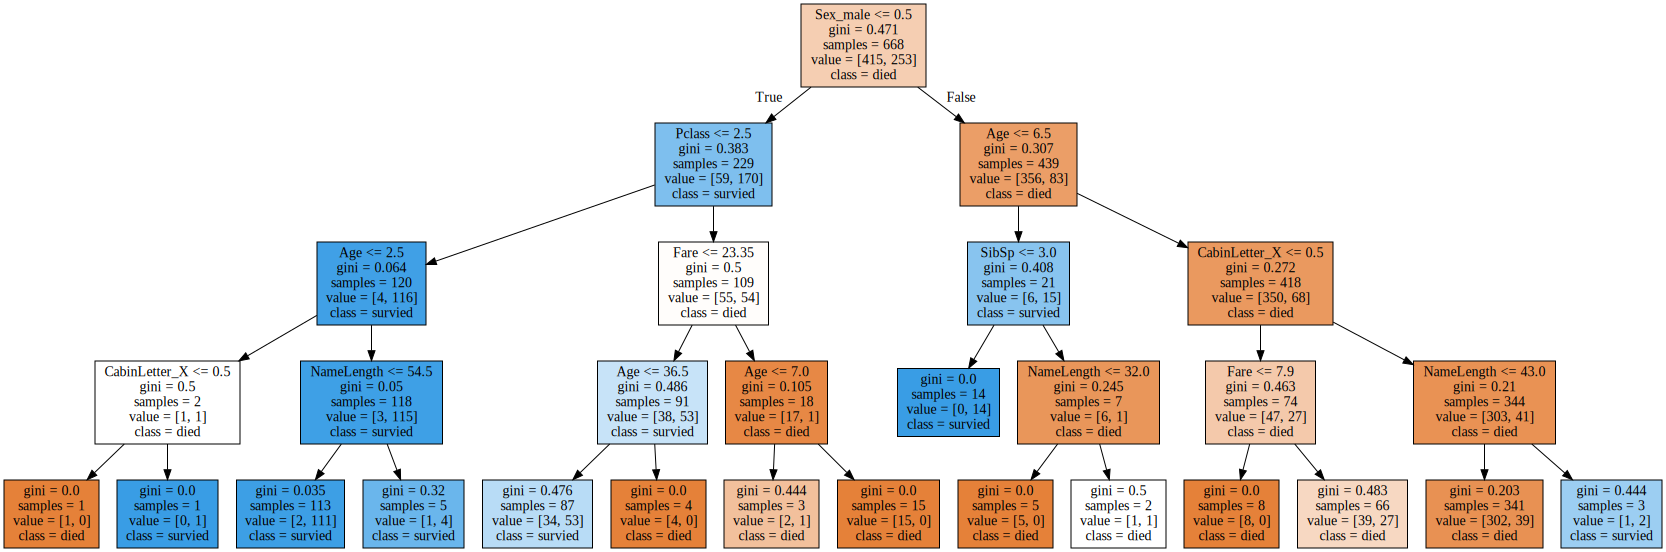

In [252]:
import graphviz
with open('titanic.dot') as f:
  graph = f.read()
graphviz.Source(graph)

In [253]:
tree.fit(X, y)
cross_val_score(tree, X, y, cv=kfold).mean()

0.8136450208597861

In [0]:
X_submit = modify_data(data_test)
y_submit = tree.predict(X_submit)


In [0]:
submit = pd.DataFrame({'PassengerId':test_pass_id}).join(pd.DataFrame({'Survived':y_submit}))

In [0]:
submit[['PassengerId', 'Survived']].to_csv('sample_data/titanic_submit.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
